# **Encabezado**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install qiskit

In [63]:
IBMQ.save_account('83566f121e1ee97e533a98ccfb2798b144a8745872daaff2a9fa06eadab636365e78eb38c76bf7984a1609de6c0c8e5afa17dc9a647985deb2f5e4b9d1f91009')
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline

Credentials already present. Set overwrite=True to overwrite.


# **Introduccion**

# **Circuitos Cuanticos**

![Quantum Gates](https://en.wikipedia.org/wiki/Quantum_logic_gate#/media/File:Quantum_Logic_Gates.png)


In [66]:
circuit  = QuantumCircuit(3, 3)
circuit.x(0)

circuit.barrier()

circuit.h(0)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.measure([0,1], [0,1])

circuit.barrier()

circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.measure([2], [2])

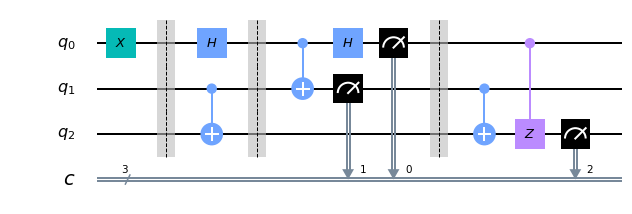

In [67]:
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
hist = execute(circuit, simulator, shots=1024)
result = hist.result().get_counts()

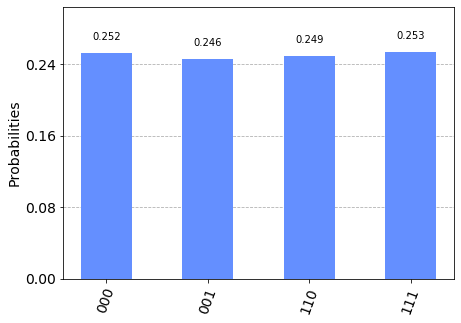

In [69]:
plot_histogram(result)

# **IBM Q Experience**

In [62]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

Credentials are already in use. The existing account in the session will be replaced.


In [70]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

5df69ebb1f82de0011d74bbc
Job Status: job has successfully run


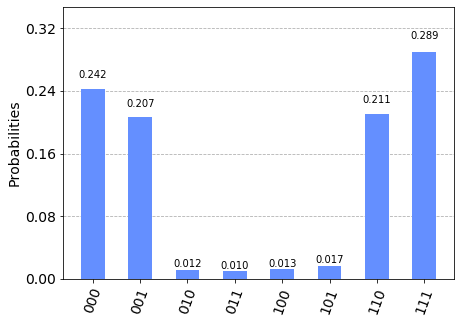

In [71]:
job_result = job.result()
plot_histogram(job_result.get_counts(circuit))

# **Conversiones**

In [121]:
analizer_states = job_result.get_counts(circuit)
print(analizer_states)

{'001': 212, '010': 12, '110': 216, '100': 13, '000': 248, '101': 17, '011': 10, '111': 296}


In [146]:
#Conversion de los valores del diccionario a valores a float
a = analizer_states
a = {k: v / total for total in (sum(a.values()),) for k, v in a.items()}
analizer_states = a

analizer_states

{'000': 0.2421875,
 '001': 0.20703125,
 '010': 0.01171875,
 '011': 0.009765625,
 '100': 0.0126953125,
 '101': 0.0166015625,
 '110': 0.2109375,
 '111': 0.2890625}

In [210]:
#Convertir a matriz
matrix_transition = np.array([list(analizer_states.values()) for item in analizer_states.values()])

#Extrayendo los estados
states = list(analizer_states.keys())

#Convertir a matrices de tipo 1D y 2D
matrix_transition = np.matrix(matrix__transition)
states = np.matrix(states)

#Convirtiendo a float
matrix_transition = matrix_transition.astype(float)

print(matrix_transition)
print(states)

[[0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]]
[['001' '010' '110' '100' '000' '101' '011' '111']]


# **Cadenas de Markov**

In [0]:
#Generador de estados
class MarkovChainStates(object):
  def __init__(self, transition_matrix):
    self.transition_matrix = transition_matrix
    self.states = list(transition_matrix.keys())

  def next_state(self, current_state):
    return np.random.choice(self.states, p=[self.transition_matrix[current_state][next_state] for next_state in self.states])
  
  def generate_states(self, current_state, no):
    future_states = []
    for i in range(no):
      next_state = self.next_state(current_state)
      future_states.append(next_state)
      current_state = next_state
    return future_states

In [0]:
#Generador de probabilidades
class MarkovChainProbabilities(object):
  def __init__(self, transition_matrix, states, iterations):
    self.transition_matrix = transition_matrix
    self.states = states
    self.iterations = iterations
  
  def generate_probabilities(self):
    for i in range(0, self.iterations):
      T = self.states * self.transition_matrix
      print(T)

In [213]:
#Analisis de Markov
mc = MarkovChainProbabilities(transition_matrix=matrix_transition, states=states, iterations = 50)
mc.generate_probabilities(transition_matrix=matrix_transition, states=states, iterations = 50)
#mc = MarkovChain(transition_matrix = matrix_transition)   
#mc.generate_states(current_state='000', no=10)

TypeError: ignored